# Problem Set 9
## Daniel Tracht

We begin with the data from the `strongdrink.txt` as we had used in Problem Set 7.

In [1]:
import pandas as pd
import numpy as np

wine = pd.read_csv('data/strongdrink.txt')

X = wine[["alco", "malic", "tot_phen", "color_int"]].values
y = wine["cultivar"].values

## Part a

We wish to create a scatterplot of the data where the $x$-variable is `alco` and the $y$-variable is `color_int`, where each dot has a different color denoting its `cultivar`:


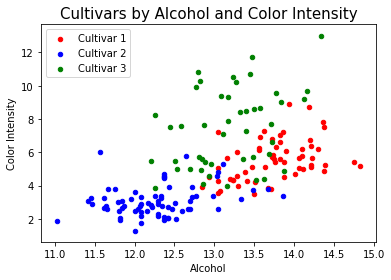

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
colors = {1:"R", 2:"B", 3:"G"}
labels = {1:"Cultivar 1", 2:"Cultivar 2", 3:"Cultivar 3"}
grouped = wine.groupby("cultivar")
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x="alco", y="color_int", label=labels[key],
               color=colors[key])
plt.title("Cultivars by Alcohol and Color Intensity", fontsize=15)
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.show()

## Part b
We wish to estimate a multinomial logistic model of `cultivar` on `alco`, `malic`, `tot_phen`, `color_int` with the specified linear predictor and report the best hyperparameters and the MSE of the optimal results

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_uniform
# The warnings were for picking very strange values of the distribution
# In seperate chunk, tested with best hyperparameters and it converged
import warnings
warnings.filterwarnings('ignore')

# setting the parameter distributions over which we test as instructed
param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}

# no need to add constant column to X with fit_intercept=True
logit = LogisticRegression(solver="saga", multi_class='multinomial', max_iter=1000,
                           fit_intercept=True)

random_search1 = \
    RandomizedSearchCV(logit, param_distributions=param_dist1,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error', iid=True)

random_search1.fit(X, y)
print("Best hyperparameters for Logistic: ", random_search1.best_params_)
print("MSE from best hyperparameters for Logistic: ", -random_search1.best_score_)

Best hyperparameters for Logistic:  {'C': 1.9591123209017924, 'penalty': 'l1'}
MSE from best hyperparameters for Logistic:  0.1534090909090909


## Part c
We wish to estimate a Random Forest model of `cultivar` on the same four features as in the previous part.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint

# setting the parameter distributions over which we test as instructed
param_dist2 = {'n_estimators': [10, 200],
              'max_depth': [2, 4],
              'min_samples_split': sp_randint(2, 20),
              'min_samples_leaf': sp_randint(2, 20),
              'max_features': sp_randint(1, 4)}

random_forest = RandomForestRegressor()

random_search2 = RandomizedSearchCV(random_forest,
                                    param_distributions=param_dist2,
                                    n_iter=200,
                                    n_jobs=-1,
                                    cv=5,
                                    random_state=25,
                                   scoring='neg_mean_squared_error',
                                   iid = True)
random_search2.fit(X, y)
print("Best hyperparameters for Random Forest: \n", random_search2.best_params_)
print("MSE from best hyperparameters for Random Forest: \n",
      -random_search2.best_score_)

Best hyperparameters for Random Forest: 
 {'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}
MSE from best hyperparameters for Random Forest: 
 0.1901378515169818


## Part d
We wish to estimate a SVM model using a Gaussian radial basis function kernel and the same four features as the previous two parts

In [5]:
from sklearn import svm

param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
              'gamma': ['scale', 'auto'],
              'shrinking': [True, False]}

# kernel='rbf' is the default
svm = svm.SVC()

random_search3 = RandomizedSearchCV(svm,
                                    param_distributions=param_dist3,
                                    n_iter=200,
                                    n_jobs=-1,
                                    cv=5,
                                    random_state=25,
                                   scoring='neg_mean_squared_error',
                                   iid=True)
random_search3.fit(X, y)
print("Best hyperparameters for SVM: \n", random_search3.best_params_)
print("MSE from best hyperparameters SVM: \n", -random_search3.best_score_)

Best hyperparameters for SVM: 
 {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
MSE from best hyperparameters SVM: 
 0.14772727272727273


## Part e
We wish to fit a multiple hidden layer neural network model on the same data as in the previous three parts.

In [6]:
from sklearn.neural_network import MLPClassifier

param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
              'activation': ['logistic', 'relu'],
              'alpha': sp_uniform(0.1, 10.0)}

mlp = MLPClassifier(solver='lbfgs')

random_search4 = RandomizedSearchCV(mlp,
                                    param_distributions=param_dist4,
                                    n_iter=200,
                                    n_jobs=-1,
                                    cv=5,
                                    random_state=25,
                                   scoring='neg_mean_squared_error',
                                   iid=True)
random_search4.fit(X, y)
print("Best hyperparameters for MLP: \n",random_search4.best_params_)
print("MSE from best hyperparameters for MLP: ", -random_search4.best_score_)

Best hyperparameters for MLP: 
 {'activation': 'relu', 'alpha': 0.47362547312722036, 'hidden_layer_sizes': 57}
MSE from best hyperparameters for MLP:  0.07954545454545454


Of the above models, we really have only the average out-of-sample MSE using the best hyperparameters to choose which one is the best predictor.  In the logistic model, we estimated an average OOS-MSE of about 0.153.  In the random forest model, we estimated an average OOS-MSE of about 0.190.  In the support vector machine model, we estimated an average OOS-MSE of about 0.148.  And in the neural network, we estimated an average OOS-MSE of about 0.080.  And while we don't have standard errors of these point estimates, it would likely be safe to say that our neural network from part e) is the best predictor of `cultivar`.